# Experiment III: Local importance

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Prepare graphs

In [3]:
from hypotest.ontologies import molecular_subgraph, full_graph
from grontocrawler.graph import produce_graph
from hypotest.graph_mutation import normalize_hypothgraph

INFO:rdflib:RDFLib Version: 4.2.1


In [4]:
sub_onto = molecular_subgraph.g
full_onto = full_graph.g

In [5]:
sub_unnorm = produce_graph.produce_graph(sub_onto, options=['existential-arcs'])
full_unnorm = produce_graph.produce_graph(full_onto, options=['existential-arcs'])

In [6]:
sub_norm, _ = normalize_hypothgraph.normalize_hypothgraph(sub_unnorm)
full_norm, _ = normalize_hypothgraph.normalize_hypothgraph(full_unnorm)

## Configuration

In [7]:
import networkx as nx

In [8]:
from hypotest.graph_generation import hypoth_conf

In [9]:
Hypoth_Conf = hypoth_conf.Hypoth_Conf

In [10]:
conf_source, conf_target = hypoth_conf.generate_max_endpoints(sub_norm)
print(conf_source, conf_target)

('http://plumdeq.xyz/ontologies/hypothesis/Synovial_inflammation', 'http://plumdeq.xyz/ontologies/hypothesis/Cartilage_degeneration')


In [11]:
nb_sub = len(list(nx.all_simple_paths(sub_norm, conf_source, conf_target)))
print('Number of paths in the subgraph is {}'.format(nb_sub))

Number of paths in the subgraph is 6


In [12]:
nb_full = len(list(nx.all_simple_paths(full_norm, conf_source, conf_target)))
print('Number of paths in the full graph is {}'.format(nb_full))

Number of paths in the full graph is 24


## Local importance with confidence function

In [14]:
from hypotest.graph_generation import boundary

In [16]:
sub_interior = list(boundary.in_boundary_interior(sub_norm, conf_source, conf_target))
full_interior = list(boundary.in_boundary_interior(full_norm, conf_source, conf_target))

### Incrementally add evidences and compute confidence

In [19]:
from hypotest.confidence import compute_confidence

`compute_confidence(hypothgraph, hypoth_conf)`

In [29]:
contributions_in_sub = {}
contributions_in_full = {}
evidence_list = []
for to_evidence in full_interior:
    new_conf = Hypoth_Conf(conf_source, conf_target, [to_evidence])
    node_label = full_norm.node[to_evidence]['label']
    contributions_in_sub[node_label] = compute_confidence.normalized_confidence(sub_norm, new_conf)
    contributions_in_full[node_label] = compute_confidence.normalized_confidence(full_norm, new_conf)

In [40]:
from operator import itemgetter

#### Subgraph confidence contributions

In [34]:
print('Subgraph knows about:')
for node in sub_interior:
    print(sub_norm.node[node]['label'])

Subgraph knows about:
Positive regulation of MMP13 production
Synovial inflammation
Biochemical imbalance
Loss of collagen
Positive regulation of Aggrecanases production
Positive regulation of Chondrocytes catabolic activity
Cartilage degeneration
Loss of proteoglycan
Positive regulation of TNF alpha overproduction


In [30]:
contributions_in_sub

{'Biochemical imbalance': 0.16666666666666666,
 'Cartilage degeneration': 0.16666666666666666,
 'Decrease of cartilage elasticity': 0.0,
 'Diminution of load bearing capacity of cartilage': 0.0,
 'Loss of collagen': 0.08333333333333333,
 'Loss of proteoglycan': 0.08333333333333333,
 'Positive regulation of Aggrecanases production': 0.027777777777777776,
 'Positive regulation of Chondrocytes catabolic activity': 0.1111111111111111,
 'Positive regulation of MMP13 production': 0.027777777777777776,
 'Positive regulation of TNF alpha overproduction': 0.16666666666666666,
 'Synovial inflammation': 0.16666666666666666,
 'Water content increase in cartilage': 0.0}

#### Full graph contributions

In [37]:
contributions_in_full

{'Biochemical imbalance': 0.10714285714285714,
 'Cartilage degeneration': 0.14285714285714285,
 'Decrease of cartilage elasticity': 0.03571428571428571,
 'Diminution of load bearing capacity of cartilage': 0.10714285714285714,
 'Loss of collagen': 0.07142857142857142,
 'Loss of proteoglycan': 0.07142857142857142,
 'Positive regulation of Aggrecanases production': 0.023809523809523808,
 'Positive regulation of Chondrocytes catabolic activity': 0.09523809523809523,
 'Positive regulation of MMP13 production': 0.023809523809523808,
 'Positive regulation of TNF alpha overproduction': 0.14285714285714285,
 'Synovial inflammation': 0.14285714285714285,
 'Water content increase in cartilage': 0.03571428571428571}

## Sorted contributions

In [43]:
sorted(contributions_in_full.items(), key=itemgetter(1), reverse=True)

[('Synovial inflammation', 0.14285714285714285),
 ('Positive regulation of TNF alpha overproduction', 0.14285714285714285),
 ('Cartilage degeneration', 0.14285714285714285),
 ('Diminution of load bearing capacity of cartilage', 0.10714285714285714),
 ('Biochemical imbalance', 0.10714285714285714),
 ('Positive regulation of Chondrocytes catabolic activity',
  0.09523809523809523),
 ('Loss of proteoglycan', 0.07142857142857142),
 ('Loss of collagen', 0.07142857142857142),
 ('Water content increase in cartilage', 0.03571428571428571),
 ('Decrease of cartilage elasticity', 0.03571428571428571),
 ('Positive regulation of Aggrecanases production', 0.023809523809523808),
 ('Positive regulation of MMP13 production', 0.023809523809523808)]

In [44]:
sorted(contributions_in_sub.items(), key=itemgetter(1), reverse=True)

[('Biochemical imbalance', 0.16666666666666666),
 ('Synovial inflammation', 0.16666666666666666),
 ('Positive regulation of TNF alpha overproduction', 0.16666666666666666),
 ('Cartilage degeneration', 0.16666666666666666),
 ('Positive regulation of Chondrocytes catabolic activity',
  0.1111111111111111),
 ('Loss of proteoglycan', 0.08333333333333333),
 ('Loss of collagen', 0.08333333333333333),
 ('Positive regulation of Aggrecanases production', 0.027777777777777776),
 ('Positive regulation of MMP13 production', 0.027777777777777776),
 ('Water content increase in cartilage', 0.0),
 ('Diminution of load bearing capacity of cartilage', 0.0),
 ('Decrease of cartilage elasticity', 0.0)]

### Accumulated confidences

How much we miss when we lack knowledge

In [47]:
missed_knowledge = {}

for node in contributions_in_full:
    missed_knowledge[node] = contributions_in_sub[node] - contributions_in_full[node]

In [48]:
sorted(missed_knowledge.items(), key=itemgetter(1), reverse=True)

[('Biochemical imbalance', 0.05952380952380952),
 ('Synovial inflammation', 0.023809523809523808),
 ('Positive regulation of TNF alpha overproduction', 0.023809523809523808),
 ('Cartilage degeneration', 0.023809523809523808),
 ('Positive regulation of Chondrocytes catabolic activity',
  0.015873015873015872),
 ('Loss of proteoglycan', 0.011904761904761904),
 ('Loss of collagen', 0.011904761904761904),
 ('Positive regulation of MMP13 production', 0.003968253968253968),
 ('Positive regulation of Aggrecanases production', 0.003968253968253968),
 ('Water content increase in cartilage', -0.03571428571428571),
 ('Decrease of cartilage elasticity', -0.03571428571428571),
 ('Diminution of load bearing capacity of cartilage', -0.10714285714285714)]

## Plot the results

In [49]:
import matplotlib.pyplot as plt

In [58]:
height = 0.5

In [60]:
full_pos = np.arange(len(contributions_in_full.values()))

In [61]:
sub_pos = [x+height for x in full_pos]

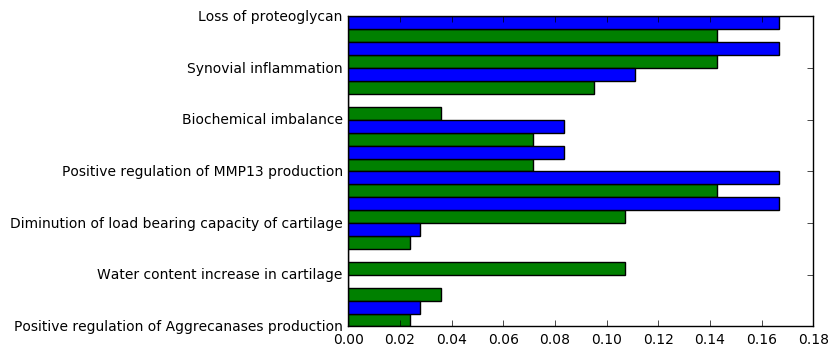

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.barh(full_pos, contributions_in_full.values(), color="g", height=height)
ax.barh(sub_pos, contributions_in_sub.values(), color="b", height=height)
ax.set_yticklabels(contributions_in_full.keys())

In [71]:
contributions_in_full.keys()

['Positive regulation of Aggrecanases production',
 'Water content increase in cartilage',
 'Diminution of load bearing capacity of cartilage',
 'Positive regulation of MMP13 production',
 'Biochemical imbalance',
 'Synovial inflammation',
 'Loss of proteoglycan',
 'Loss of collagen',
 'Decrease of cartilage elasticity',
 'Positive regulation of Chondrocytes catabolic activity',
 'Positive regulation of TNF alpha overproduction',
 'Cartilage degeneration']

In [73]:
import pandas as pd

In [78]:
sub_contributions = pd.Series(contributions_in_sub)
full_contributions = pd.Series(contributions_in_full)

In [95]:
data = pd.DataFrame({'$H_{sub}$': sub_contributions, '$H_{full}$': full_contributions})
data

,$H_{full}$,$H_{sub}$
Biochemical imbalance,0.107143,0.166667
Cartilage degeneration,0.142857,0.166667
Decrease of cartilage elasticity,0.035714,0.000000
Diminution of load bearing capacity of cartilage,0.107143,0.000000
Loss of collagen,0.071429,0.083333
Loss of proteoglycan,0.071429,0.083333
Positive regulation of Aggrecanases production,0.023810,0.027778
Positive regulation of Chondrocytes catabolic activity,0.095238,0.111111
Positive regulation of MMP13 production,0.023810,0.027778
Positive regulation of TNF alpha overproduction,0.142857,0.166667


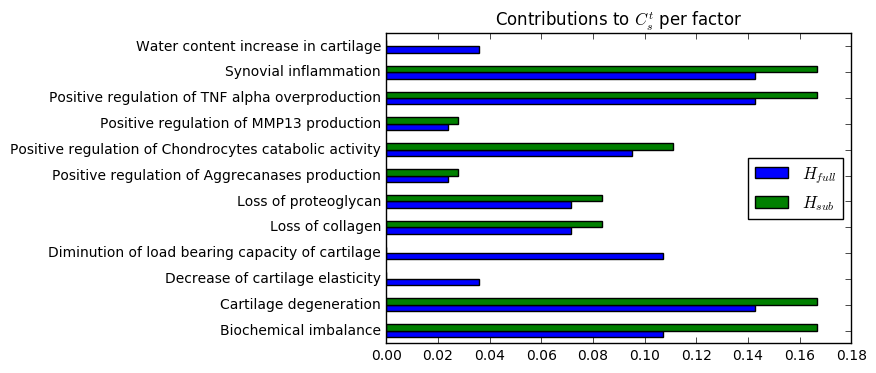

In [114]:
plot = data.plot.barh(title="Contributions to $C_s^t$ per factor")

### Save figure

In [100]:
import os

In [102]:
path_to_images = os.path.abspath('../images/results-paper/exp3-rel-conf/')

In [115]:
fig = plot.get_figure()
fig.savefig(os.path.join(path_to_images, 'local_importance.pdf'), bbox_inches='tight')